## **Лабораторна робота №2**

##### Виконав студент групи МІТ-31 __Черевач Юрій__

**Частина 1:** __Регресія на згенерованому наборі даних__
1. Згенеруйте набір даних для регресії за допомогою sklearn.datasets.make_regression (використати не менше 5 параметрів). Набір даних повинен містити не менше 1000 екземплярів.
2. Розділіть дані на навчальний та тестовий набори у співвідношенні 80% - 20%.
3. Побудуйте модель регресії на навчальних даних та оцініть її точність на тестових даних. Використовуйте будь-який регресійний алгоритм за вибором (наприклад, лінійна регресія, дерево рішень, Random Forest тощо).

          0         1         2         3         4         5           6
0 -0.933978 -0.986374  1.596273  0.649352 -0.109303 -1.656564   29.312696
1  0.453817 -0.746149  0.418460  1.536316 -0.350766 -1.077995   19.015646
2  1.765483  0.878786  1.493550 -0.782634  0.539317  0.890437  229.179649
3  0.842300  0.647606  1.151912  1.935018  1.403432 -0.363204  282.563152
4 -0.153679 -0.892623  1.328344  1.000343 -0.804009 -0.289460   32.100092
                 0            1            2            3            4  \
count  1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
mean      0.011895    -0.041566    -0.036303    -0.011245    -0.005915   
std       1.014720     1.000727     1.009883     1.014391     1.014733   
min      -3.590020    -3.840601    -3.555050    -2.989281    -4.053908   
25%      -0.686857    -0.696096    -0.717914    -0.717266    -0.696989   
50%      -0.003146    -0.042762    -0.036611     0.001960    -0.062735   
75%       0.689950     0.634627     0.

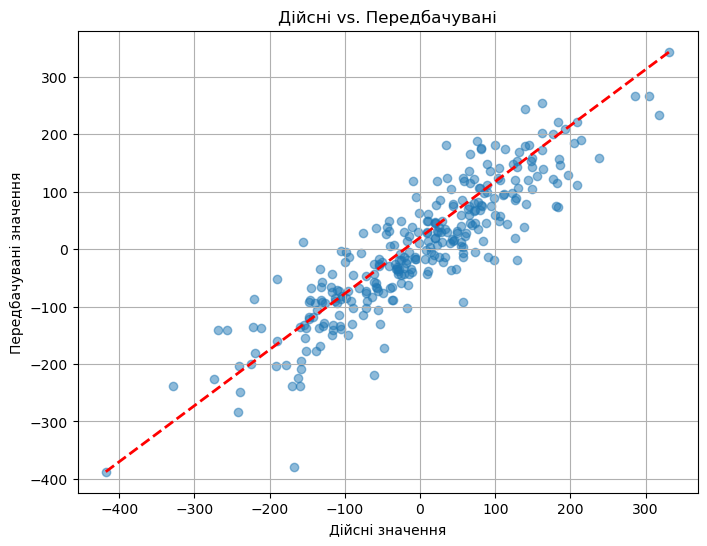

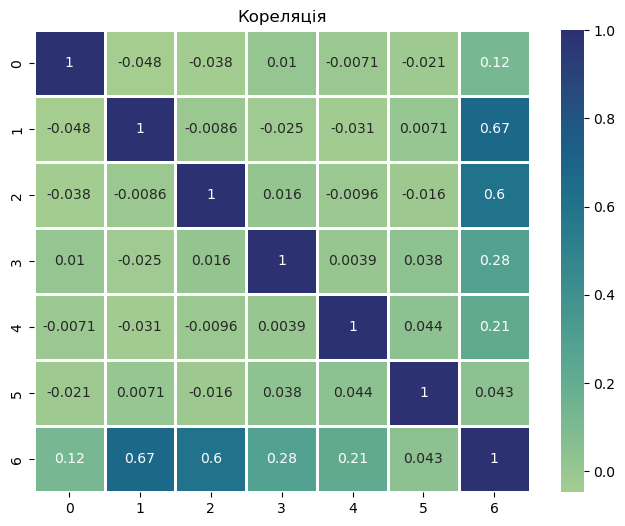

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


#генеруємо набір даних для регресії
X, y = make_regression(n_samples=1500, n_features=6, bias=2.4, noise=2)
"""
Х - (input samples) генерація вхідних даних для моделі
у - (outрut values) вихідні значення, передбачені на основі згенерованих вхідних даних (Х)
n_samples - кількість вхідних значень
n_features - кількість ознак (колонок)
bias - зсув вихідних значень
noise - шум
"""
#формування таблиці з даними
df = pd.DataFrame(X)
df[6] = y  #шостий рядок датасету -- для значень
df.to_csv("data_part1.csv", index=False) #зберігаю 

data = pd.read_csv('data_part1.csv') # читаю збережений датасет

print(data.head())
print(data.describe()) #опис датасету

#розділяємо дані на тестовий та навчальний набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

#cтворюємо модель
model = DecisionTreeRegressor() #дерево рішень - контрольований метод навчання
model.fit(X_train, y_train) #треную модель на даних

y_pred = model.predict(X_test) #генерація значень (передбачуваних)

#обрахування похибок
mse = mean_squared_error(y_test, y_pred) 
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {r2}")

#візуалізовую дані
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Дійсні значення")
plt.ylabel("Передбачувані значення")
plt.title("Дійсні vs. Передбачувані")

#обраховую максимальні і мінімальні значення для виведення на графік лінії
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.grid()
plt.show()

#Матриця кореляції
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, linewidth=2, cmap='crest')
plt.title('Кореляція')
plt.show()